In [1]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"]=True

paramater_1 = [2.80052541 0.57962242]
paramater_2 = [2.76107061 0.6046959 ]
paramater_3 = [2.27645093 0.64315219]
paramater_4 = [1.97649398 0.66773359]
error =  [0.17017978395222025, 0.021014360643221104]


TypeError: can't multiply sequence by non-int of type 'float'

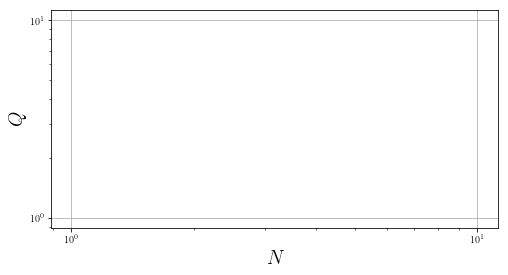

In [5]:
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt


#Carpet_qw
#N
x_1data = np.array([8,8**2,8**3,8**4,8**5,8**6])
#Q
y_1data = np.array([6.246, 26.0417, 97.0874, 340.909, 1166.67, 3870.97])
#P_max
#y_1data =np.array([0.705246829, 0.34622916, 0.171098214, 0.101856263, 0.061084703281225346, 0.04399967312892803])

#N
x_2data = np.array([12,12**2,12**3,12**4,12**5])
#Q
y_2data = np.array([8.077544, 47.02194, 239.29, 1132.075, 5057])
#P_max
#y_2_alldata = np.array([0.50961287322599,0.190997674105756,0.0853751937986552, 0.0422202190569415, 0.02274282074631438])#0.02347438])

#N
x_3data = np.array([16,16**2,16**3,16**4, 16**5])
#Q
y_3data = np.array([9.778357, 72.46377, 454.5455, 2860, 16959])
#P_max
#y_3_alldata = np.array([0.47261284, 0.142889778, 0.053351703, 0.021755424, 0.009252847684113105])

#SC(6,4) 2/14
#N
x_4data = np.array([20, 20**2,20**3,20**4])
#Q
y_4data = np.array([11.40684, 102.0408, 800, 5900])
#P_max
#y_4_alldata = np.array([0.430503759692511, 0.11793745524880356, 0.03612007127072087, 0.0124784215407569])
#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    return a_1*x**b_1
    #return a_1*x**b_1*(np.log(x))
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    return a_2*x**b_2
    #return a_2*x**b_2*(np.log(x))
    #return a_2*x**b_2*(np.log(x))
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    return a_3*x**b_3
    #return a_3*x**b_3*(np.log(x))
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    return a_4*x**b_4
    #return a_4*x**b_4*(np.log(x))
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
####
def fig():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("$N$",fontsize=20)
    plt.ylabel("$Q$",fontsize=20)
    #fitting
    plt.plot(x_1data, y_1, '--',label="SC(3,1)",color="deeppink",linewidth="1")
    plt.plot(x_2data, y_2, '--',label="SC(4,2)",color="blue",linewidth="1")
    plt.plot(x_3data, y_3, '--',label="SC(5,3)",color="lime",linewidth="1")
    plt.plot(x_4data, y_4, '--',label="SC(6,4)",color="red",linewidth="1")
    #data
    plt.plot(x_1data, y_1data, ".",color="red",markersize="5.0")
    plt.plot(x_2data, y_2data, "o",color="blue",markersize="5.0")
    plt.plot(x_3data, y_3data, "o",color="green",markersize="5.0")
    plt.plot(x_4data, y_4data, "o",color="red",markersize="5.0")
    ######
    plt.legend(loc=2)
    plt.tight_layout()
    #plt.savefig("sc_qn.png",format="png")#,bbox_inches="tight",dpi=500)
#error
x_data = np.copy(x_1data)
y_data = np.copy(y_1data)
#Xdata = np.log(x_data*np.log(x_data))
#Ydata = np.log(y_data)

Xdata = np.log(x_1data)
Ydata = np.log(y_1data)
A = paramater_optimal_1[1] # parameter_b
B = np.log(paramater_optimal_1[0]) # parameter_a

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (-A*Xdata[i] - B + Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
#plt.savefig("sc_qn.eps")
fig()

paramater_1 = [1.5099405  0.47634294]
paramater_2 = [0.54006166 0.46839412]
paramater_3 = [0.67449338 0.4663918 ]
paramater_4 = [0.6130702  0.48457708]
error =  [0.03369137402879074, 0.0027990470738731245]


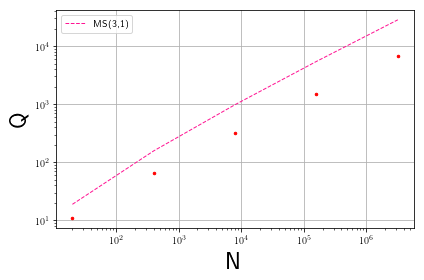

In [67]:
#menger fitting to square scaling
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt


#Menger

x_1data = np.array([20,20**2,20**3,20**4,20**5]) #lattice size N
y_1data = np.array([10.99835, 64.9284, 315.557, 1482.333, 6880]) #scaling Q
#y_1data = np.array([0.60751, 0.27765, 0.20452, 0.17994, 0.16731]) #scaling P

x_2data = np.array([32,32**2,32**3, 32**4])
y_2data = np.array([13.67521,112.6761, 727.2727, 4947])
#y_2data = np.array([0.487378, 0.20533, 0.13325, 0.10549])

x_3data = np.array([44,44**2,44**3])
y_3data = np.array([16.39344, 173.913, 1526])
#y_3data = np.array([0.46206, 0.164694, 0.09282])

x_4data = np.array([56,56**2,56**3])
y_4data = np.array([18.9035, 243.9024, 2575.32835])
#y_4data = np.array([0.42, 0.13409966016008523, 0.06899132866077101])

#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    return a_1*(x*np.log(x))**b_1  #sqrt(NlnN)
    #return a_1*x**b_1*(np.log(x))   #sqrtN*lnN
    #return a_1*x*(np.log(x))**b_1
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    #return a_2*(x*np.log(x))**b_2
    return a_2*x**b_2*(np.log(x))
    #return a_2*x*(np.log(x))**b_2
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    #return a_3*(x*np.log(x))**b_3
    return a_3*x**b_3*(np.log(x))
    #return a_3*x*(np.log(x))**b_3
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    #return a_4*(x*np.log(x))**b_4
    return a_4*x**b_4*(np.log(x))
    #return a_4*x*(np.log(x))**b_4
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
####
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N",fontsize=24)
plt.ylabel("Q",fontsize=24)
def fig():
    #fitting
    plt.plot(x_1data, y_1, '--',label="MS(3,1)",color="deeppink",linewidth="1")
    #plt.plot(x_2data, y_2, '--',label="MS(4,2)",color="blue",linewidth="1")
    #plt.plot(x_3data, y_3, '--',label="MS(5,3)",color="lime",linewidth="1")
    #plt.plot(x_4data, y_4, '--',label="MS(6,4)",color="olive",linewidth="1")
    #data
    plt.plot(x_1data, y_1data, ".",color="red",markersize="5.0")
    #plt.plot(x_2data, y_2data, "h",color="blue",markersize="5.0")
    #plt.plot(x_3data, y_3data, "+",color="green",markersize="8.0")
    #plt.plot(x_4data, y_4data, "d",color="olive",markersize="4.0")
    ######
    plt.legend(loc=2)
    plt.tight_layout()
    #plt.savefig("ms_qw_qn.png",format="png",dpi=500)
#################
#error
x_data = np.copy(x_1data)
y_data = np.copy(y_1data)
#paramater_a = np.copy(paramater_optimal_1[0]) 
#paramater_b = np.copy(paramater_optimal_1[1]) 
A = paramater_optimal_1[1]
B = np.log(paramater_optimal_1[0])
#####
Xdata = np.log(x_data*np.log(x_data))
Ydata = np.log(y_data)
#Xdata = np.log(x_data)
#Ydata = np.log(y_data/(np.log(x_data)))

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (-A*Xdata[i] - B + Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
fig() #paramater = [a, b]です

paramater_1 = [ 1.17864047 -0.86994892]
paramater_2 = [ 1.35605748 -0.84115837]
paramater_3 = [ 0.39095023 -0.76402191]
paramater_4 = [ 0.32703942 -0.69388669]
error =  [0.12948347676983088, 0.01940560202496561]


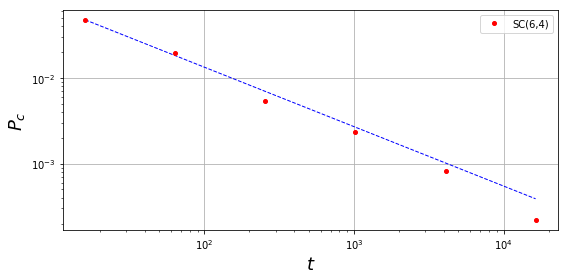

In [10]:
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt

#plt.rcParams["text.usetex"]=True

#Carpet_Random_walk
#SC(3,1)#stage10
#周期境界
#x_1data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
#y_1data = np.array([133304, 29485, 8315, 2323, 716, 191, 64])/1000000
#固定端時間
#x_1data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
#y_1data = np.array([273038, 105647, 32681, 9475, 2845, 802, 234])/1000000
x_1data = np.array([4**2,4**4,4**5,4**6,4**7])
y_1data = np.array([105647,9475, 2845, 802, 234])/1000000
#x_1data = np.array([6,6**2,6**3,6**4,6**5, 6**6])
#y_1data = np.array([87550, 13318, 2856, 570, 96, 18])/1000000
#x_1data = np.array([6**2,6**3,6**4,6**5, 6**6])
#y_1data = np.array([13318,2856, 570, 96, 18])/1000000
#SC(4,2)stage8
#周期
#x_2data = np.array([6, 6**2,6**3,6**4,6**5, 6**6])
#y_2data = np.array([88187, 17130, 4162, 830, 221, 39])/1000000
#固定端
#2/8
x_2data = np.array([ 4**2,4**3,4**4, 4**5, 4**6, 4**7])
y_2data = np.array([ 131847, 39807, 14518, 4336, 1440, 459])/1000000

#x_2_alldata = np.array([6, 6**2,6**3,6**4,6**5, 6**6, 6**7])
#y_2_alldata = np.array([225182, 67277, 16146, 3421, 902, 168, 43])/1000000
#x_2_alldata = np.array([ 6**2,6**3,6**4,6**5, 6**6, 6**7])
#y_2_alldata = np.array([ 67277, 16146, 3421, 902, 168, 43])/1000000
#x_2data = np.array([6**2,6**4,6**5, 6**6, 6**7])
#y_2data = np.array([(68134+67277)/2,(16002+16146)/2, (3341+3421)/2, (919+902)/2, (180+168)/2, 43])/1000000
#y_2data= np.array([ 67277, 3421, 902, 168, 43])/1000000
#
#x_2_1data = np.array([6, 6**2,6**3,6**4,6**5, 6**6])
#y_2_1data = np.array([225869, 68134, 16002, 3341, 919, 180])/1000000
#x_2data = np.array([6**2,6**3,6**4,6**5, 6**6])
#y_2data = np.array([68134, 16002, 3341, 919, 180])/1000000
#x_2data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
#y_2data = np.array([132650,35388,9977, 3590, 1079,351,131])/1000000
#SC(5,3)
#2.11
#x_3_alldata = np.array([6,6**2,6**3,6**4,6**5, 6**6,6**7])
#y_3_alldata = np.array([225983,82413, 17388, 5275, 1043, 322, 61])/1000000
#x_3_alldata = np.array([6**2,6**3,6**4,6**5, 6**6,6**7])
#y_3_alldata = np.array([82413, 17388, 5275, 1043, 322, 61])/1000000
#y_3_alldata = np.array([(225148+225805+225983)/3,(82326+82780+82413)/3, (17200+17425+17388)/3, (5348+5388+5275)/3, (1112+1084+1043)/3,(306+279+322)/3, 61])/(10**6)
#x_3data = np.array([6**2,6**4,6**5, 6**6,6**7])
#y_3data = np.array([82413,  5275, 1043, 322, 61])/1000000
x_3data = np.array([ 4**2,4**3,4**4, 4**5, 4**6, 4**7])
y_3data = np.array([  46955, 16598, 5167, 2124, 554, 218])/1000000


#x_3data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
#y_3data = np.array([132888, 37757, 12473, 3878, 1619, 450, 161])/1000000
#x_3data = np.array([4**5,4**6,4**7])
#y_3data = np.array([1619, 450, 161])/1000000
#固定端
#y_3data =  np.array([82326+82780,  5348+5388, 1112+1084, 306+279 ])/2000000
#y_3_1data = np.array([ 225148 + 225805, 82326+82780, 17200+17425, 5348+5388, 1112+1084, 306+279])/2000000
#y_3data = np.array([82326, 5348, 1112, 306])/1000000
#周期
#x_3_1data = np.array([6,6**2,6**3,6**4,6**5, 6**6])
#x_3data = np.array([6**2, 6**4,6**5, 6**6])
#x_3data = np.array([6, 6**6])
#y_3data = np.array([88384,21135, 4356, 1292, 288, 76])/1000000
####
#SC(6,4)
#2.13
x_4data = np.array([4**2,4**3,4**4, 4**5, 4**6, 4**7])
y_4data = np.array([47487,19611, 5455, 2353, 831, 220])/1000000
#x_4_alldata = np.array([6,6**2,6**3,6**4,6**5, 6**6,6**7])
#y_4_alldata = np.array([225584, 90059, 18862, 6133, 1414, 361, 98])/1000000
#x_4_alldata = np.array([6**2,6**3,6**4,6**5, 6**6,6**7])
#y_4_alldata = np.array([90059, 18862, 6133, 1414, 361, 98])/1000000
#x_4data = np.array([6**2,6**4,6**5, 6**6,6**7])
#y_4data = np.array([90059,  6133, 1414, 361, 98])/1000000
#x_4data = np.array([4**3,4**4,4**5,4**6, 4**7])
#y_4data = np.array([59206, 16681, 7143,2594,712])/1000000
#x_4data = np.array([6,6**2,6**3,6**4,6**5, 6**6])
#y_4data = np.array([226458, 89572, 19011, 5986, 1385, 432])/1000000
#x_4data = np.array([6**3, 6**4,6**5, 6**6])
#y_4data = np.array([19011, 5986, 1385, 432])/1000000
#x_4data = np.array([6, 6**3, 6**6])
#y_4data = np.array([226458, 19011,432])/1000000
#x_4_1data = np.array([6,6**2,6**3,6**4,6**5, 6**6])
#y_4_1data = np.array([226458, 89572, 19011, 5986, 1385, 432])/1000000
#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    return a_1*x**b_1
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    return a_2*x**b_2
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    return a_3*x**b_3
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    return a_4*x**b_4
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
####
def fig():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("$t$",fontsize=18)
    plt.ylabel("$P_c$",fontsize=18)
    
    #plt.plot(x_2data, y_2, '--',color="black",linewidth="1")
    #plt.plot(x_3data, y_3, '--',color="deeppink",linewidth="1.5")
    plt.plot(x_4data, y_4, '--',color="blue",linewidth="1")
    #data
    #plt.plot(x_2data, y_2data, "o",label="SC(4,2)",color="blue",markersize="5.0")
    #plt.plot(x_2_alldata,y_2_alldata, "o",color="blue",markersize="5.0")
    
    #plt.plot(x_3data, y_3data, "o",label="SC(5,3)",color="black",markersize="6.0")
    #plt.plot(x_3_alldata,y_3_alldata, "o",color="black",markersize="6.0")
    
    plt.plot(x_4data, y_4data, "o",label="SC(6,4)",color="red",markersize="4.0")
    #plt.plot(x_4_alldata, y_4_alldata, "o",color="red",markersize="4.0")
    ######
    plt.legend(loc=1)
    plt.tight_layout()
#################
#error
Xdata = np.log(x_2data)
Ydata = np.log(y_2data)
A = paramater_optimal_2[1]
B = np.log(paramater_optimal_2[0])

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (A*Xdata[i] + B - Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
#plt.savefig("rw_sc.eps")#,bbox_inches="tight",dpi=500)
fig()

paramater_1 = [ 0.40747909 -1.27598816]
paramater_2 = [ 0.30346272 -1.06786385]
paramater_3 = [ 0.28378809 -1.01560217]
paramater_4 = [ 0.27433948 -0.99243309]
paramater_5 = [ 0.26878993 -0.97615717]
error =  [0.37975239733498506, 0.06125338159592352]


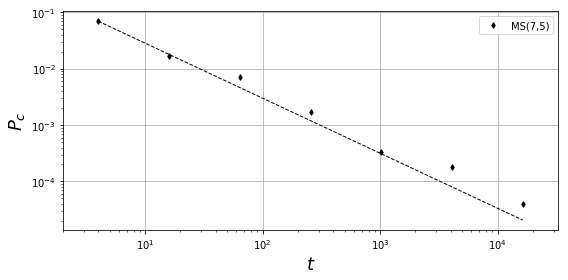

In [8]:
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
#rcParams["text.usetex"]=True
#Menger_Random_walk
x_1data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
y_1data = np.array([69484,11849, 2000, 414, 78, 9,3])/1000000

x_2data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
y_2data = np.array([69048,15757, 3526, 671, 213, 26, 11])/1000000

x_3data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
y_3data =np.array([69487,16503, 5197, 855, 283, 79, 13])/1000000

x_4data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
y_4data =  np.array([625125+69324,147931+16419, 58675+6391, 10971+1179, 2845+339, 1188+124, 230+23])/10000000
#y_4data =  np.array([625125,147931, 58675, 10971, 2845, 1188, 230])/9000000

x_5data = np.array([4,4**2,4**3,4**4,4**5,4**6,4**7])
y_5data = np.array([69647, 16505, 7212, 1736, 339, 177, 40])/1000000
#x_5data = np.array([4**2,4**4,4**5,4**6,4**7])
#y_5data = np.array([16505,  1736, 339, 177, 40])/1000000
#####
#x_5data = np.array([4**1,4**2, 4**3,4**4,4**5,4**6,4**7,4**8,4**9])
#y_5data = np.array([227661,114798,50980, 9752, 2531, 1055, 211, 44, 22])/1000000
#x_4data = np.array([4**2, 4**5,4**9])
#y_4data =  np.array([114798, 2531 , 22])/1000000
#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    return a_1*x**b_1
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    return a_2*x**b_2
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    return a_3*x**b_3
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    return a_4*x**b_4
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
parameter_initial_5 = np.array([0.0, 0.0])
def func(x, a_5, b_5):
    return a_5*x**b_5
paramater_optimal_5, covariance_5 = scipy.optimize.curve_fit(func, x_5data, y_5data, p0=parameter_initial_5)
############
print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
print("paramater_5 =", paramater_optimal_5)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
y_5 = func(x_5data,paramater_optimal_5[0],paramater_optimal_5[1])
####
def fig():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("$t$",fontsize=18)
    plt.ylabel("$P_c$",fontsize=18)
    plt.xlim([2,4**7.5])
    #fitting
    #plt.plot(x_1data, y_1, '--',color="deeppink",linewidth="1")
    #plt.plot(x_2data, y_2, '--',color="blue",linewidth="1")
    #plt.plot(x_3data, y_3, '--',color="lime",linewidth="1")
    #plt.plot(x_4data, y_4, '--',color="olive",linewidth="1")
    plt.plot(x_5data, y_5, '--',color="black", lw="1")
    #data
    #plt.plot(x_1data, y_1data, ".",label="MS(3,1)",color="red",markersize="5.0")
    #plt.plot(x_1_alldata, y_1_alldata, ".",label="MS(3,1)",color="red",markersize="5.0")
    
    #plt.plot(x_2data, y_2data, "h",label="MS(4,2)",color="blue",markersize="5.0")
    #plt.plot(x_3data, y_3data, "+",label="MS(5,3)",color="green",markersize="8.0")
    #plt.plot(x_4data, y_4data, "d",label="MS(6,4)",color="olive",markersize="4.0")
    plt.plot(x_5data, y_5data, "d",label="MS(7,5)",color="black",markersize="4.0")
    ######
    plt.legend(loc=1)
    plt.tight_layout()
    #plt.savefig("ms_rw.png",format="png",bbox_inches="tight",dpi=500)
#############error
x_data = np.copy(x_5data)
y_data = np.copy(y_5data)
paramater_A = np.copy(paramater_optimal_5[1]) 
paramater_B = np.copy(paramater_optimal_5[0]) 
#####
#Xdata = np.log(x_data*np.log(x_data))
Xdata = np.log(x_data)
Ydata = np.log(y_data)
A = paramater_A
B = np.log(paramater_B)

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (A*Xdata[i] + B - Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)
fig()
delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
#plt.savefig("rw_ms.eps")

paramater_2 = [0.54006166 0.46839412]
paramater_3 = [0.67449338 0.4663918 ]
paramater_4 = [0.6130702  0.48457708]
error =  [1.607965967176124, 0.13902752186608053]


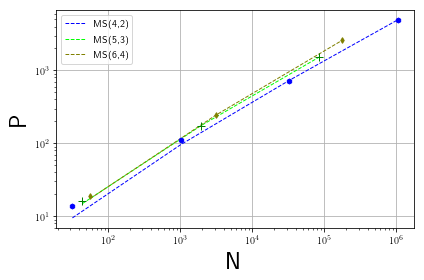

In [23]:
#menger fitting to square scaling
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt
#Menger
x_1data = np.array([20,20**2,20**3,20**4,20**5])
#x_1data = np.array([20**3,20**4,20**5])
y_1data = np.array([10.99835, 64.9284, 315.557, 1482.333, 6880])
#y_1data = np.array([0.60751, 0.27765, 0.20452, 0.17994, 0.16731])
#y_1data = np.array([0.20452, 0.17994, 0.16731])

x_2data = np.array([32,32**2,32**3, 32**4])
#x_2data = np.array([32**2,32**3, 32**4])
y_2data = np.array([13.67521,112.6761, 727.2727, 4947])
#y_2data = np.array([0.487378, 0.20533, 0.13325, 0.10549])
#y_2data = np.array([0.20533, 0.13325, 0.10549])

x_3data = np.array([44,44**2,44**3])
#x_3data = np.array([44**2,44**3])
y_3data = np.array([16.39344, 173.913, 1526])
#y_3data = np.array([0.46206, 0.164694, 0.09282])
#y_3data = np.array([ 0.164694, 0.09282])

x_4data = np.array([56,56**2,56**3])
#x_4data = np.array([56**2,56**3])
y_4data = np.array([18.9035, 243.9024, 2575.32835])
#y_4data = np.array([0.42, 0.13409966016008523, 0.06899132866077101])
#y_4data = np.array([ 0.13409966016008523, 0.06899132866077101])
#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    #return a_1*(x*np.log(x))**b_1  #sqrt(NlnN)
    return a_1*x**b_1*(np.log(x))   #sqrtN*lnN
    #return a_1*np.sqrt(x)*(np.log(x))**b_1 #sqrt
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    #return a_2*(x*np.log(x))**b_2
    return a_2*x**b_2*(np.log(x))
    #return a_2*np.sqrt(x)*(np.log(x))**b_2
    #return a_2*np.sqrt(x)*(np.log(x))**b_2
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    #return a_3*(x*np.log(x))**b_3
    return a_3*x**b_3*(np.log(x))
    #return a_3*(np.sqrt(x)*np.log(x))**b_3
    #return a_3*np.sqrt(x)*(np.log(x))**b_3
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    #return a_4*(x*np.log(x))**b_4
    return a_4*x**b_4*(np.log(x))
    #return a_4*(np.sqrt(x)*np.log(x))**b_4
    #return a_4*np.sqrt(x)*(np.log(x))**b_4
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
#print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
####
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N",fontsize=24)
plt.ylabel("P",fontsize=24)
def fig():
    #fitting
    #plt.plot(x_1data, y_1, '--',label="MS(3,1)",color="deeppink",linewidth="1")
    plt.plot(x_2data, y_2, '--',label="MS(4,2)",color="blue",linewidth="1")
    plt.plot(x_3data, y_3, '--',label="MS(5,3)",color="lime",linewidth="1")
    plt.plot(x_4data, y_4, '--',label="MS(6,4)",color="olive",linewidth="1")
    #data
    #plt.plot(x_1data, y_1data, ".",color="red",markersize="5.0")
    plt.plot(x_2data, y_2data, "h",color="blue",markersize="5.0")
    plt.plot(x_3data, y_3data, "+",color="green",markersize="8.0")
    plt.plot(x_4data, y_4data, "d",color="olive",markersize="4.0")
    ######
    plt.legend(loc=2)
    plt.tight_layout()
    #plt.savefig("ms_qw_qn.png",format="png",dpi=500)
#################
#error
x_data = np.copy(x_2data)
y_data = np.copy(y_2data)
paramater_A = np.copy(paramater_optimal_2[1]) 
paramater_B = np.copy(paramater_optimal_2[0]) 
#####
Xdata = np.log(x_data*np.log(x_data))
#Xdata = np.log(np.sqrt(x_data)*np.log(x_data))
#Xdata = np.log
Ydata = np.log(y_data)
A = paramater_A
B = np.log(paramater_B)

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (-A*Xdata[i] - B + Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
fig()

[ 3.1906839   0.57090898 -0.21610391]
error =  [6.5235477035304275, 0.6873180439202317]


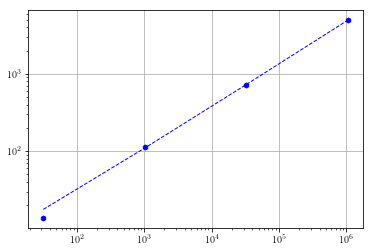

In [22]:
x_2data = np.array([32,32**2,32**3, 32**4])
y_2data = np.array([13.67521,112.6761, 727.2727, 4947])

parameter_initial_2 = np.array([0.0, 0.0, 0.0])
def func(x, a_2, b_2, c_2):
    return a_2*x**b_2*(np.log(x))**c_2

paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
print(paramater_optimal_2)
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1],paramater_optimal_2[2])
plt.plot(x_2data, y_2, '--',label="MS(4,2)",color="blue",linewidth="1")
plt.plot(x_2data, y_2data, "h",color="blue",markersize="5.0")
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

#error
x_data = np.copy(x_2data)
y_data = np.copy(y_2data)
paramater_a = np.copy(paramater_optimal_2[0]) #a_2
paramater_b = np.copy(paramater_optimal_2[1]) #b_2
paramater_c = np.copy(paramater_optimal_2[2]) #c_2
#####
Xdata = np.log(x_data)
Ydata = np.log(y_data)

A = np.log(paramater_a)
B = paramater_b
C = paramater_c

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (-A*Xdata[i] - B -C + Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_c = 
print("error = ",[ delta_b,delta_a])
#fig()

paramater_1 = [1.3471969  0.53086836]
paramater_2 = [1.13707121 0.56556686]
paramater_3 = [ 1.69937085 -0.33777986]
paramater_4 = [ 1.82368286 -0.35273294]
error =  [0.017087327075003197, 0.0017081621162321253]


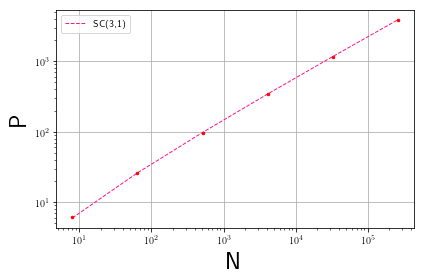

In [45]:
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt
#Carpet_qw
x_1data = np.array([8,8**2,8**3,8**4,8**5,8**6])
y_1data = np.array([6.246, 26.0417, 97.0874, 340.909, 1166.67, 3870.97])
#y_1data =np.array([0.705246829, 0.34622916, 0.171098214, 0.101856263, 0.061084703281225346, 0.04399967312892803])

x_2data = np.array([12,12**2,12**3,12**4,12**5])
#x_2data = np.array([12**3,12**4,12**5])
y_2data = np.array([8.077544, 47.02194, 234.375, 1153.846, 5326])
#y_2data = np.array([0.50961287322599,0.190997674105756,0.0853751937986552, 0.0422202190569415, 0.02347438])
#y_2data = np.array([0.0853751937986552, 0.0422202190569415, 0.02347438])

x_3data = np.array([16,16**2,16**3,16**4])
#x_3data = np.array([16**2,16**3,16**4])
#y_3data = np.array([9.778357, 72.46377, 454.5455, 2860])
y_3data = np.array([0.47261284, 0.142889778, 0.053351703, 0.021755424])
#y_3data = np.array([0.142889778, 0.053351703, 0.021755424])

x_4data = np.array([20,20**2,20**3,20**4])
#x_4data = np.array([20**2,20**3,20**4])
#y_4data = np.array([11.40684, 102.0408, 800, 5900])
y_4data = np.array([0.430503759692511, 0.117072053591583, 0.0351942482595713,0.0117346743714589])
#y_4data = np.array([0.117072053591583, 0.0351942482595713,0.0117346743714589])
#############
parameter_initial_1 = np.array([0.0, 0.0])
def func(x, a_1, b_1):
    #return a_1*(x*np.log(x))**b_1
    return a_1*x**b_1*(np.log(x))**b_1
paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func, x_1data, y_1data, p0=parameter_initial_1)
#############
parameter_initial_2 = np.array([0.0, 0.0])
def func(x, a_2, b_2):
    return a_2*(x*np.log(x))**b_2
paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func, x_2data, y_2data, p0=parameter_initial_2)
#############
parameter_initial_3 = np.array([0.0, 0.0])
def func(x, a_3, b_3):
    return a_3*(x*np.log(x))**b_3
paramater_optimal_3, covariance_3 = scipy.optimize.curve_fit(func, x_3data, y_3data, p0=parameter_initial_3)
############
parameter_initial_4 = np.array([0.0, 0.0])
def func(x, a_4, b_4):
    return a_4*(x*np.log(x))**b_4
paramater_optimal_4, covariance_4 = scipy.optimize.curve_fit(func, x_4data, y_4data, p0=parameter_initial_4)
############
print("paramater_1 =", paramater_optimal_1)
print("paramater_2 =", paramater_optimal_2)
print("paramater_3 =", paramater_optimal_3)
print("paramater_4 =", paramater_optimal_4)
############
y_1 = func(x_1data,paramater_optimal_1[0],paramater_optimal_1[1])
y_2 = func(x_2data,paramater_optimal_2[0],paramater_optimal_2[1])
y_3 = func(x_3data,paramater_optimal_3[0],paramater_optimal_3[1])
y_4 = func(x_4data,paramater_optimal_4[0],paramater_optimal_4[1])
####
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N",fontsize=24)
plt.ylabel("P",fontsize=24)
def fig():
    #fitting
    plt.plot(x_1data, y_1, '--',label="SC(3,1)",color="deeppink",linewidth="1")
    #plt.plot(x_2data, y_2, '--',label="SC(4,2)",color="blue",linewidth="1")
    #plt.plot(x_3data, y_3, '--',label="SC(5,3)",color="lime",linewidth="1")
    #plt.plot(x_4data, y_4, '--',label="SC(6,4)",color="olive",linewidth="1")
    #data
    plt.plot(x_1data, y_1data, ".",color="red",markersize="5.0")
    #plt.plot(x_2data, y_2data, "h",color="blue",markersize="5.0")
    #plt.plot(x_3data, y_3data, "+",color="green",markersize="8.0")
    #plt.plot(x_4data, y_4data, "d",color="olive",markersize="4.0")
    ######
    plt.legend(loc=2)
    plt.tight_layout()
    #plt.savefig("ms_qw_qn.png",format="png",dpi=500)
#################
#error
x_data = np.copy(x_1data)
y_data = np.copy(y_1data)
paramater_A = np.copy(paramater_optimal_1[1]) 
paramater_B = np.copy(paramater_optimal_1[0]) 
#####
Xdata = np.log(x_data*np.log(x_data))
Ydata = np.log(y_data)
A = paramater_A
B = np.log(paramater_B)

def summary():
    s = 0
    for i in range(len(Xdata)):
        s += (A*Xdata[i] + B - Ydata[i])**2
    return s

def x_d_sum():
    return sum(Xdata*Xdata)

def x_sum():
    return sum(Xdata)

delta_y = np.sqrt(summary()/(len(Xdata-2)))
delta_a = delta_y*np.sqrt(len(Xdata)/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
delta_b = delta_y*np.sqrt(x_d_sum()/(len(Xdata)*x_d_sum()-x_sum()**2 ) )
print("error = ",[ delta_b,delta_a])
fig()